In [37]:
import pandas as pd

uri = 'data/projects.csv'
dados = pd.read_csv(uri)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [38]:
mapa = {
    'expected_hours':'horas_esperadas',
    'price':'preco',
    'unfinished':'nao_finalizado',
}
dados.rename(columns=mapa, inplace=True)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [39]:
troca = {
    0: 1,
    1: 0
}
dados['finalizado'] = dados['nao_finalizado'].map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


### SVC não Linear

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)

In [41]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

In [42]:
modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)
print(f'A acuracia foi de {(acuracia*100):.2f}%')

A acuracia foi de 59.07%


#### Curva de decisão

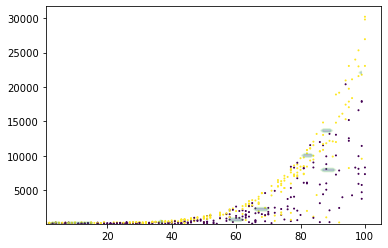

In [43]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contour(xx, yy, z, alpha=0.1)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

#### Escalomento de Dados

Devido a discrepancia de variação dos valores entre os eixos o algoritmo pode não trabalhar de maneira eficiente.
Por isso devemos escalonar os valores dos eixos de maneira com fiquem dentro de um intervalo mais concisos. 

In [44]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)

x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

#### Treinando os escalonador

In [45]:

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

#### Treinano o modelo com os dados já escalonados

In [46]:
modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A acuracia foi de {(acuracia*100):.2f}%')

A acuracia foi de 66.85%


#### Curva de decisão dados escalonados

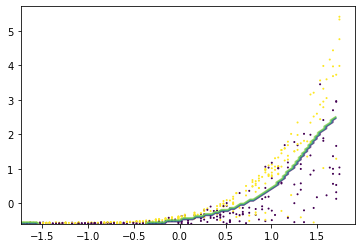

In [47]:
data_x = teste_x[:, 0] # Horas Esperadas
data_y = teste_x[:, 1] # Preco

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contour(xx, yy, z, alpha=0.5)
plt.scatter(data_x, data_y, c=teste_y, s=1)